In [1]:
include("init_libs.jl")
using LsqFit
const all_times = linspace(0, 150, 26)
const plot_xs = linspace(0, 150, 1000)
const ntimes = length(all_times);

In [2]:
params, ratios, uncs = NaCsData.calc_survival("data/na_multi_rabi.csv")
params_total, ratios_total, uncs_total = NaCsData.calc_survival("data/na_multi_rabi_total.csv")
ratios = ratios[:, 2]
uncs = uncs[:, 2]
ratios_total = ratios_total[:, 2]
uncs_total = uncs_total[:, 2];

In [3]:
function get_nth_data(data, n, scale)
    data[((n - 1) * ntimes + 1):(n * ntimes)] ./ scale
end

ratios1 = get_nth_data(ratios, 1, ratios_total[1])
uncs1 = get_nth_data(uncs, 1, ratios_total[1])
ratios2 = get_nth_data(ratios, 2, ratios_total[1])
uncs2 = get_nth_data(uncs, 2, ratios_total[1])
ratios3 = get_nth_data(ratios, 3, ratios_total[1])
uncs3 = get_nth_data(uncs, 3, ratios_total[1])

ratios4 = get_nth_data(ratios, 4, ratios_total[2])
uncs4 = get_nth_data(uncs, 4, ratios_total[2])
ratios5 = get_nth_data(ratios, 5, ratios_total[2])
uncs5 = get_nth_data(uncs, 5, ratios_total[2])
ratios6 = get_nth_data(ratios, 6, ratios_total[2])
uncs6 = get_nth_data(uncs, 6, ratios_total[2]);

In [4]:
function get_model(η, Δn)
    function model(x, p)
        return p[2] .* (1 .- Trap.thermal_sideband.(p[1], x ./ p[3], η, Δn))
    end
end;

In [5]:
model0_34 = get_model(0.34, 0);

(fit.param,estimate_errors(fit)) = ([4.11791,0.88231,7.59731],[1.24991,0.0414721,0.176215])

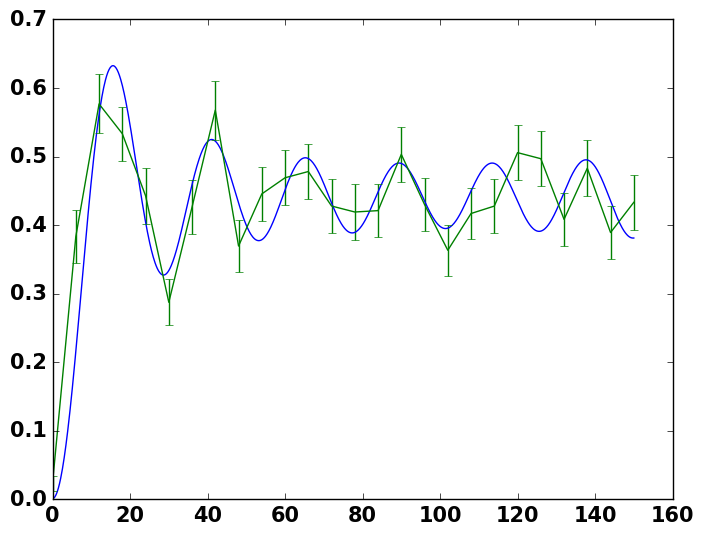

In [6]:
fit = curve_fit(model0_34, all_times, ratios1, [4.0, 0.8, 8])
@show fit.param, estimate_errors(fit)
ys = model0_34(plot_xs, fit.param)
plot(plot_xs, ys)
errorbar(all_times, ratios1, uncs1);

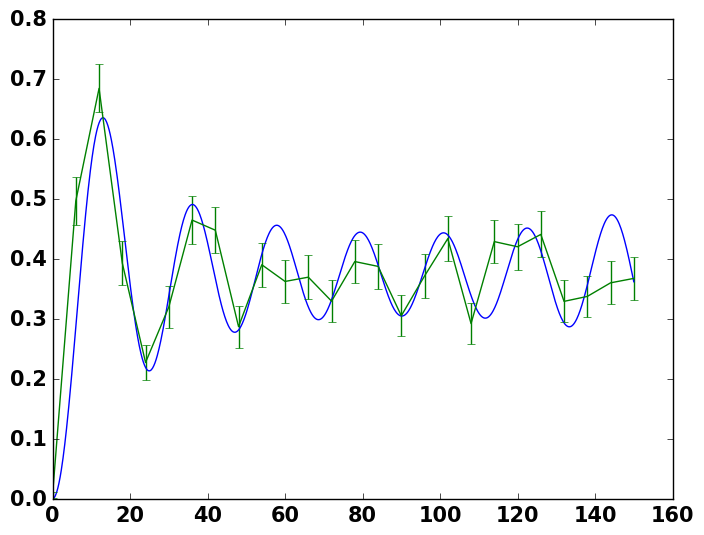

(fit4.param,estimate_errors(fit4)) = ([2.20522,0.747738,6.75355],[0.845509,0.0449656,0.0933765])


In [7]:
fit4 = curve_fit(model0_34, all_times, ratios4, [4.0, 0.8, 8])
@show fit4.param, estimate_errors(fit4)
ys = model0_34(plot_xs, fit4.param)
plot(plot_xs, ys)
errorbar(all_times, ratios4, uncs4);

In [8]:
_params, _ratios, _uncs = NaCsData.calc_survival("data/na_cold_flop.csv")
_ratios = _ratios[:, 2]
_uncs = _uncs[:, 2];

In [9]:
_times = _params * 1e6;

In [10]:
model0_377 = get_model(0.377, 0);

(_fit.param,estimate_errors(_fit)) = ([1.4454,0.654171,17.3302],[0.345701,0.0289317,0.345904])

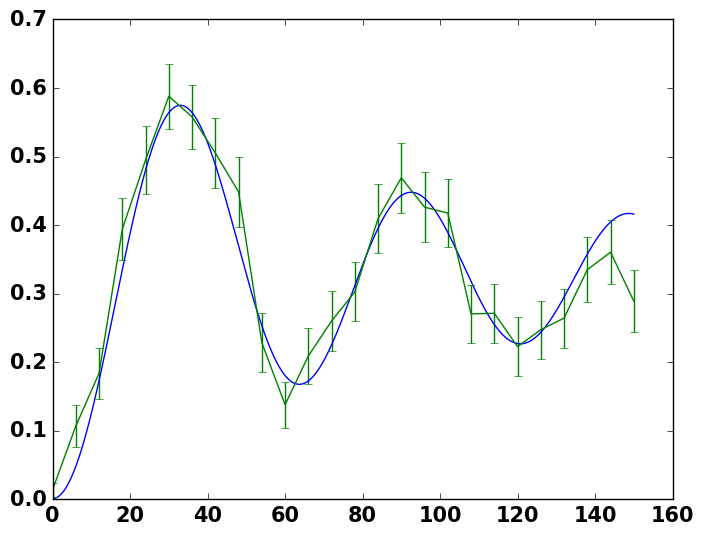

In [11]:
_fit = curve_fit(model0_377, _times, _ratios, [2.0, 0.8, 14])
@show _fit.param, estimate_errors(_fit)
ys = model0_377(plot_xs, _fit.param)
plot(plot_xs, ys)
errorbar(_times, _ratios, _uncs);